<a href="https://colab.research.google.com/github/NARAYANAN0101/DEEP-LEARNING-PROJECT/blob/main/music_classification_song.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install required libraries
!pip install demucs librosa pandas numpy soundfile

# Imports
import os
import pandas as pd
import numpy as np
import librosa
from demucs.separate import main as demucs_separate

# -------------------------------
# Step 1: Split song into vocals
# -------------------------------
def split_song(input_path, output_dir="separated_songs"):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Demucs separation
    demucs_separate([
        "-n", "htdemucs",  # model
        "-o", output_dir,
        input_path
    ])

    song_name = os.path.splitext(os.path.basename(input_path))[0]
    vocals_path = os.path.join(output_dir, "htdemucs", song_name, "vocals.wav") # Corrected path based on Demucs output
    if not os.path.exists(vocals_path):
      raise FileNotFoundError(f"Vocals file not found at {vocals_path}. Check Demucs output structure.")
    return vocals_path


# -------------------------------
# Step 2: Extract numerical features
# -------------------------------
def extract_features(audio_path, n_mfcc=20):
    print(f"Attempting to load audio file: {audio_path}") # Print the path being loaded
    if not os.path.exists(audio_path): # Check if the file exists
        raise FileNotFoundError(f"Audio file not found at {audio_path}.")
    try:
        y, sr = librosa.load(audio_path, sr=None)
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
        mfccs_mean = np.mean(mfccs.T, axis=0)
        return mfccs_mean
    except Exception as e: # Catch any exception during librosa.load
        raise RuntimeError(f"Error loading audio file {audio_path}: {e}")

# -------------------------------
# Step 3: Save features to CSV
# -------------------------------
def save_to_csv(features, label, csv_file="music_dataset.csv"):
    df = pd.DataFrame([features])
    df['label'] = label

    if os.path.exists(csv_file):
        df.to_csv(csv_file, mode='a', header=False, index=False)
    else:
        df.to_csv(csv_file, index=False)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 16.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.1/87.1 kB 8.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.6/59.6 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.1/249.1 kB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.0/40.0 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.5/75.5 kB 6.4 MB/s eta 0:00:00
  Created wheel for demucs: filename=demucs-4.0.1-py3-none-any.whl size=78388 sha256=42b3a36cf8110d14fec9d69b5aa4cb06cdd56e10dc317f2bf72026d9e8c6907e
  Stored in directory: /root/.cache/pip/wheels/1b/0c/20/a3b3daa1f9b65c8b0445729f94740ec335d0f86f1066c5c414
  Created wheel for julius: filename=julius-0.2.7-

In [ ]:
# -------------------------------
# Step 4: Full pipeline for one song
# -------------------------------
def process_song(song_path, label):
    # Split
    vocals_path = split_song(song_path)

    # Extract features
    features = extract_features(vocals_path)

    # Save to CSV
    save_to_csv(features, label)

    print(f"Processed {song_path} → added to CSV as {label}.")

# -------------------------------
# Example usage
# -------------------------------
process_song("/content/Kanave-Kanave-MassTamilan.com.mp3", label="Love failure")

Selected model is a bag of 1 models. You will see that many progress bars per track.
Separated tracks will be stored in /content/separated_songs/htdemucs
Separating track /content/Kanave-Kanave-MassTamilan.com.mp3


100%|████████████████████████████████████████████████████████████████████████| 292.5/292.5 [09:56<00:00,  2.04s/seconds]
/usr/local/lib/python3.12/dist-packages/torchaudio/_backend/utils.py:337: UserWarning: In 2.9, this function's implementation will be changed to use torchaudio.save_with_torchcodec` under the hood. Some parameters like format, encoding, bits_per_sample, buffer_size, and ``backend`` will be ignored. We recommend that you port your code to rely directly on TorchCodec's encoder instead: https://docs.pytorch.org/torchcodec/stable/generated/torchcodec.encoders.AudioEncoder
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchaudio/_backend/ffmpeg.py:247: UserWarning: torio.io._streaming_media_encoder.StreamingMediaEncoder has been deprecated. This deprecation is part of a large refactoring effort to transition TorchAudio into a maintenance phase. The decoding and encoding capabilities of PyTorch for both audio and video are being consolidated into TorchCodec. Ple

Attempting to load audio file: separated_songs/htdemucs/Kanave-Kanave-MassTamilan.com/vocals.wav
Processed /content/Kanave-Kanave-MassTamilan.com.mp3 → added to CSV as Love failure.


In [ ]:


# Install necessary libraries
!pip install tensorflow librosa pandas numpy scikit-learn demucs soundfile matplotlib seaborn joblib

import os
import numpy as np
import pandas as pd
import librosa
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
import joblib



In [ ]:
# Load dataset
data = pd.read_csv("music_dataset.csv")

# Separate features and labels
X = data.drop('label', axis=1).values
y = data['label'].values

# Encode labels to numbers
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape for CNN (samples, timesteps, features)
X_scaled = np.expand_dims(X_scaled, axis=2)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_categorical, test_size=0.2, random_state=42)


In [ ]:
model = Sequential([
    Conv1D(64, 3, activation='relu', input_shape=(X_scaled.shape[1], 1)),
    MaxPooling1D(2),
    Dropout(0.3),
    Conv1D(128, 3, activation='relu'),
    MaxPooling1D(2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(y_categorical.shape[1], activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)               │ (None, 18, 64)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 9, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 9, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 7, 128)         │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 3, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 384)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 75,014 (293.02 KB)

 Trainable params: 75,014 (293.02 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=16,
    validation_data=(X_test, y_test)
)


Epoch 1/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.2308 - loss: 1.7254 - val_accuracy: 0.0000e+00 - val_loss: 1.9126
Epoch 2/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.2308 - loss: 1.6634 - val_accuracy: 0.0000e+00 - val_loss: 2.0073
Epoch 3/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.4615 - loss: 1.5812 - val_accuracy: 0.2500 - val_loss: 2.0953
Epoch 4/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.4615 - loss: 1.5206 - val_accuracy: 0.2500 - val_loss: 2.1818
Epoch 5/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.4615 - loss: 1.4782 - val_accuracy: 0.2500 - val_loss: 2.2602
Epoch 6/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.4615 - loss: 1.4113 - val_accuracy: 0.2500 - val_loss: 2.3365
Epoch 7/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.5385 - loss: 1.3669 - val_accuracy: 0.2500 - val_loss: 2.4166
Epoch 8/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 0.4615 - loss: 1.4045 - val_accuracy: 0.2500 - val_loss: 

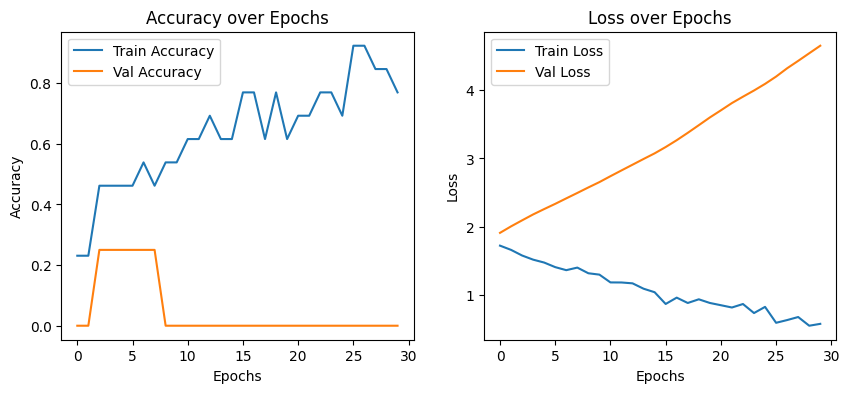

In [ ]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
# Evaluate model on test data
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"✅ Final Test Accuracy: {test_acc * 100:.2f}%")


✅ Final Test Accuracy: 0.00%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


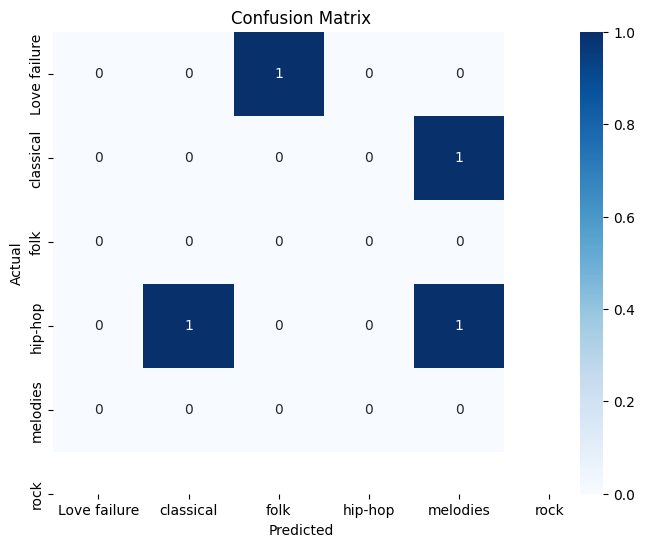


📊 Classification Report:

              precision    recall  f1-score   support

Love failure       0.00      0.00      0.00       1.0
   classical       0.00      0.00      0.00       1.0
        folk       0.00      0.00      0.00       2.0

   micro avg       0.00      0.00      0.00       4.0
   macro avg       0.00      0.00      0.00       4.0
weighted avg       0.00      0.00      0.00       4.0



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:2687: UserWarning: labels size, 3, does not match size of target_names, 6
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_di

In [ ]:
# Predict on test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
labels = encoder.classes_

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("\n📊 Classification Report:\n")
print(classification_report(y_true, y_pred_classes, target_names=labels, labels=np.unique(y_true)))

In [ ]:
model.save("music_genre_cnn.h5")
import joblib
joblib.dump(encoder, "label_encoder.pkl")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

In [ ]:
import os
import numpy as np
import pandas as pd
import librosa
from tensorflow.keras.models import load_model
import joblib
from demucs.separate import main as demucs_separate
import warnings
warnings.filterwarnings('ignore')


In [ ]:
def predict_genre(song_path):
    """
    Predicts the genre of a given song using trained CNN model.
    Steps:
    1. Split vocals using Demucs
    2. Extract MFCC features
    3. Load trained model and encoders
    4. Predict the genre
    """

    # -----------------------
    # Step 1: Split vocals
    # -----------------------
    output_dir = "predict_output"
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    print("🎧 Splitting vocals and music using Demucs (please wait)...")
    demucs_separate(["-n", "htdemucs", "-o", output_dir, song_path])

    song_name = os.path.splitext(os.path.basename(song_path))[0]
    vocals_path = os.path.join(output_dir, "htdemucs", song_name, "vocals.wav") # Corrected path

    # -----------------------
    # Step 2: Extract MFCC Features
    # -----------------------
    print("🎵 Extracting MFCC features...")
    y, sr = librosa.load(vocals_path, sr=None)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)
    features = np.mean(mfccs.T, axis=0)
    features = np.expand_dims(features, axis=0)

    # -----------------------
    # Step 3: Load Model and Preprocessors
    # -----------------------
    print("📦 Loading trained model and encoders...")
    model = load_model("music_genre_cnn.h5")
    encoder = joblib.load("label_encoder.pkl")
    scaler = joblib.load("scaler.pkl")

    # Preprocess
    features_scaled = scaler.transform(features)
    features_scaled = np.expand_dims(features_scaled, axis=2)

    # -----------------------
    # Step 4: Predict Genre
    # -----------------------
    prediction = model.predict(features_scaled)
    predicted_label = encoder.inverse_transform([np.argmax(prediction)])

    confidence = np.max(prediction) * 100
    print(f"\n✅ Predicted Genre: {predicted_label[0].upper()}")
    print(f"🎯 Confidence: {confidence:.2f}%")

    return predicted_label[0]
predict_genre("/content/single pasaga.mp3")

🎧 Splitting vocals and music using Demucs (please wait)...
Selected model is a bag of 1 models. You will see that many progress bars per track.
Separated tracks will be stored in /content/predict_output/htdemucs
Separating track /content/single pasaga.mp3


100%|██████████████████████████████████████████████| 228.14999999999998/228.14999999999998 [07:40<00:00,  2.02s/seconds]


🎵 Extracting MFCC features...


📦 Loading trained model and encoders...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step

✅ Predicted Genre: ROCK
🎯 Confidence: 78.50%


'rock'